In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_curve, roc_auc_score, classification_report, plot_roc_curve, precision_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data
data=pd.read_csv("mortgage_final_data.csv")

In [3]:
data.columns

Index(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'balance_time',
       'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time', 'period',
       'gdp_avg', 'LTV_dif', 'LTV_inc', 'gdp_orig', 'gdp_dif', 'gdp_inc',
       'uer_orig', 'uer_avg', 'uer_dif', 'uer_inc', 'hpi_avg', 'hpi_dif',
       'hpi_inc', 'status_time'],
      dtype='object')

D:\programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTV_orig_time', ylabel='Density'>

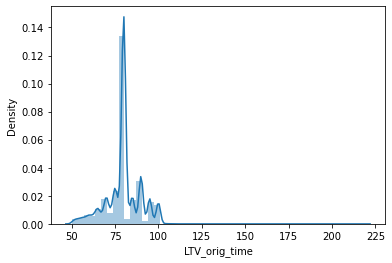

In [4]:
sns.distplot(data["LTV_orig_time"])

In [5]:
data.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,gdp_dif,gdp_inc,uer_orig,uer_avg,uer_dif,uer_inc,hpi_avg,hpi_dif,hpi_inc,status_time
0,1,48,-7,25,113,29087.21,26.658065,9.200,146.45,2.715903,...,-0.183234,-0.063203,4.7,7.241667,3.6,0.765957,176.657917,59.42,0.682753,1
1,2,26,18,25,138,105654.77,65.469851,7.680,225.10,2.151365,...,-0.747772,-0.257929,4.7,4.700000,0.0,0.000000,225.695000,38.19,0.204323,2
2,3,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,...,-1.206168,-0.416044,4.7,4.580000,-0.2,-0.042553,222.164000,127.79,1.426546,2
3,5,27,18,25,138,52100.71,66.346343,9.155,222.39,2.361722,...,-0.537415,-0.185371,4.7,4.600000,-0.3,-0.063830,224.593333,35.48,0.189824,2
4,6,56,19,25,139,190474.11,75.834755,6.580,181.43,1.717053,...,-1.182084,-0.407736,4.7,7.319355,1.9,0.404255,175.143226,-9.99,-0.052189,1


In [6]:
#define independent and dependent variables
y=data["status_time"].values
x=data.drop(["status_time","id"], axis=1).values

In [7]:
#print number of each class
print("default:", len(data[data["status_time"]==1]))
print("pay off:", len(data[data["status_time"]==2]))

default: 15151
pay off: 26578


In [8]:
#split train and test set
train_x, test_x, train_y, test_y=train_test_split(x, y, train_size=0.8)

In [9]:
#display the number of train set
print("default before SMOTE:", len(train_y[train_y==1]))
print("pay off before SMOTE:", len(train_y[train_y==2]))

default before SMOTE: 12111
pay off before SMOTE: 21272


In [10]:
#use SMOTE to deal with imbalanced data
SMOTE1=SMOTE(random_state=0)
S_train_x, S_train_y=SMOTE1.fit_sample(train_x, train_y)

In [11]:
#display the number of training set after SMOTE
print("default after SMOTE:", len(S_train_y[S_train_y==1]))
print("pay off after SMOTE:", len(S_train_y[S_train_y==2]))

default after SMOTE: 21272
pay off after SMOTE: 21272


In [12]:
#define model(with all hyperparameter default values)
model=AdaBoostClassifier()
#train model
model.fit(S_train_x, S_train_y)

AdaBoostClassifier()

In [13]:
#show the metrics of model fitted(with all hyperparameter default values)
#predict test set
y_pred=model.predict(test_x)
#print classification report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.70      0.69      3040
           2       0.83      0.82      0.82      5306

    accuracy                           0.78      8346
   macro avg       0.76      0.76      0.76      8346
weighted avg       0.78      0.78      0.78      8346



In [14]:
cross_val_score_list=[]
for i in [AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier()]:
    cross_val_score_list.append([str(i), cross_val_score(i, S_train_x, S_train_y, cv=5).mean()])
cross_val_score_list

[['AdaBoostClassifier()', 0.8059435063722733],
 ['GradientBoostingClassifier()', 0.8200230619500036],
 ['BaggingClassifier()', 0.8100096786261821]]

In [15]:
cross_val_score(RandomForestClassifier(), S_train_x, S_train_y, cv=5).mean()

0.8322222279316742

In [16]:
precision_list=[]
for i in [AdaBoostClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), BaggingClassifier()]:
    precision_list.append(cross_val_score(i, S_train_x, S_train_y, cv=5, scoring="precision").mean())
precision_list

[0.8158288213969964,
 0.8375084736690092,
 0.8286925382261776,
 0.8002331383401398]

D:\programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.7, 0.86)

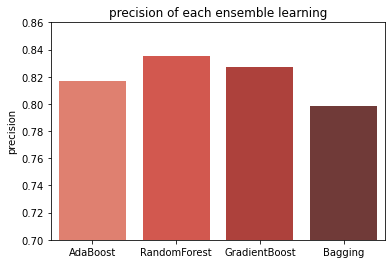

In [17]:
sns.barplot(["AdaBoost", "RandomForest", "GradientBoost","Bagging"], [0.816789460543581, 0.8353987518583686, 0.8274741206383401, 0.7987020440083401], palette="Reds_d")
plt.ylabel("precision")
plt.title("precision of each ensemble learning")
plt.ylim([0.7,0.86])

In [18]:
recall_list=[]
for i in [AdaBoostClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), BaggingClassifier()]:
    recall_list.append(cross_val_score(i, S_train_x, S_train_y, cv=5, scoring="recall").mean())
recall_list

[0.788121035734944, 0.8231912344060502, 0.8057498106434146, 0.829585094998721]

D:\programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.7, 0.86)

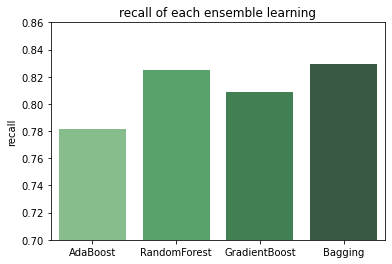

In [19]:
sns.barplot(["AdaBoost", "RandomForest", "GradientBoost","Bagging"], [0.7817756590782815,
 0.8251868827757889,
 0.8088019370713436,
 0.8291881563013129], palette="Greens_d")
plt.ylabel("recall")
plt.title("recall of each ensemble learning")
plt.ylim([0.7,0.86])

In [20]:
precision_list=[]
for i in [AdaBoostClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), BaggingClassifier()]:
    model=i
    model.fit(S_train_x, S_train_y)
    pred_y=model.predict(test_x)
    precision_list.append(precision_score(test_y, pred_y))
precision_list

[0.689119170984456, 0.7262773722627737, 0.7133986928104575, 0.6694661067786443]

In [21]:
time_list=[]
import time
for i in [AdaBoostClassifier(),  GradientBoostingClassifier(), RandomForestClassifier(),BaggingClassifier()]:
    start=time.time()
    model=i
    model.fit(S_train_x, S_train_y)
    end=time.time()
    real_time=end-start
    time_list.append([str(i), real_time])
time_list

[['AdaBoostClassifier()', 8.401873350143433],
 ['GradientBoostingClassifier()', 47.05393671989441],
 ['RandomForestClassifier()', 22.537761449813843],
 ['BaggingClassifier()', 14.434826612472534]]

D:\programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Time-consumed of each ensemble learning')

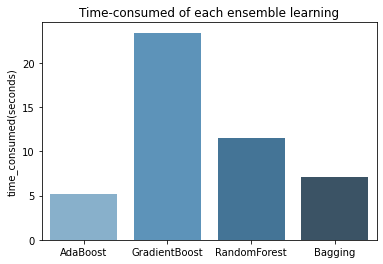

In [22]:
sns.barplot(["AdaBoost", "GradientBoost","RandomForest", "Bagging"], [5.187010288238525, 23.43094253540039, 11.506381034851074, 7.101903438568115], palette="Blues_d")
plt.ylabel("time_consumed(seconds)")
plt.title("Time-consumed of each ensemble learning")

In [23]:
scaler=StandardScaler()
S_x=scaler.fit_transform(S_train_x)
model=GradientBoostingClassifier()

In [24]:
#data standarization
start=time.time()
model.fit(S_x, S_train_y)
end=time.time()
real_time=end-start
real_time

44.327752351760864

D:\programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'time consumed for GDBT before/after data scaling')

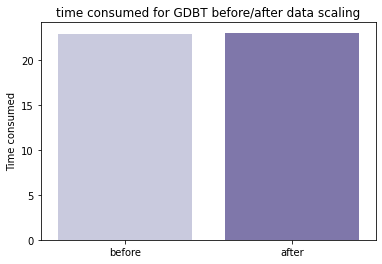

In [25]:
sns.barplot(["before", "after"], [22.9, 23.09], palette="Purples")
plt.ylabel("Time consumed")
plt.title("time consumed for GDBT before/after data scaling")

D:\programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The accuracy of each ensemble learning')

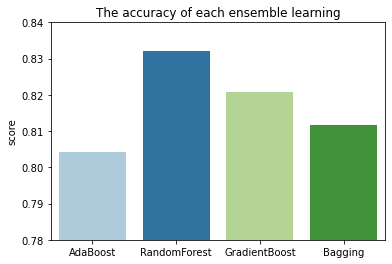

In [26]:
sns.barplot(["AdaBoost", "RandomForest", "GradientBoost", "Bagging"], [0.80418, 0.832, 0.82087, 0.81166], palette="Paired")
plt.ylim([0.78,0.84])
plt.ylabel("score")
plt.title("The accuracy of each ensemble learning")

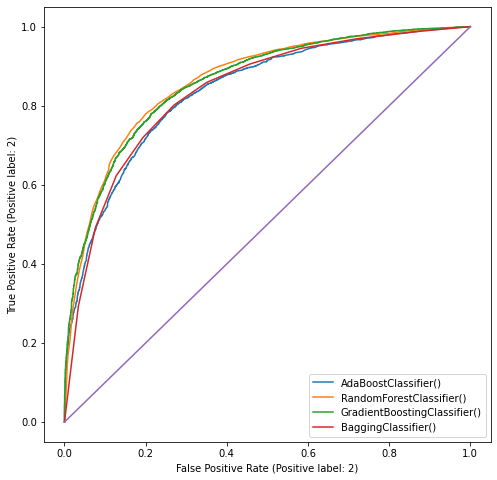

In [27]:
fig, ax=plt.subplots(figsize=(8,8))
for i in [AdaBoostClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), BaggingClassifier()]:
    model=i
    model.fit(S_train_x, S_train_y)
    plot_roc_curve(model, test_x, test_y, ax=ax, label=str(i))
plt.plot([0,1],[0,1])

In [28]:
#now we check whether our model is overfitting or underfitting
#extract the variables for learning curve
number, train_loss, test_loss=learning_curve(RandomForestClassifier(), S_train_x, S_train_y, cv=5, train_sizes=[0.1, 0.33, 0.55, 0.78, 1. ])

Text(0.5, 1.0, 'RF Learning curve')

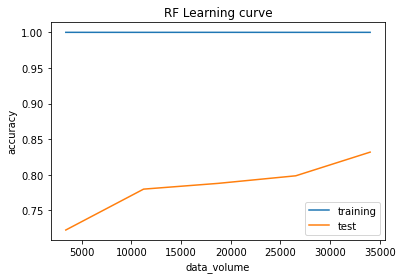

In [29]:
#display learning curve
plt.plot(number, train_loss.mean(axis=1), label=True)
plt.plot(number, test_loss.mean(axis=1), label=True)
plt.legend(["training", "test"])
plt.xlabel("data_volume")
plt.ylabel("accuracy")
plt.title("RF Learning curve")

In [30]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [31]:
model=[LGBMClassifier(), XGBClassifier()]
ac_list=[]
for i in model:
    ac_list.append(cross_val_score(i, S_train_x, S_train_y, cv=5).mean())
ac_list

D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[0.8319404084604575, 0.832198980332393]

D:\programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The accuracy of each ensemble learning')

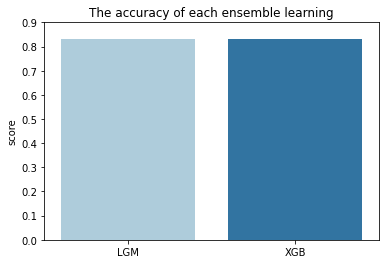

In [32]:
sns.barplot(["LGM", "XGB"], [0.8305802914532654, 0.8319664619941352], palette="Paired")
plt.ylim([0,0.9])
plt.ylabel("score")
plt.title("The accuracy of each ensemble learning")

In [33]:
time_list=[]
import time
for i in [LGBMClassifier(), XGBClassifier()]:
    model=i
    start=time.time()
    model.fit(S_train_x, S_train_y)
    end=time.time()
    real_time=end-start
    time_list.append(real_time)
time_list

D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[1.1863725185394287, 10.800771236419678]

D:\programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The runtime of each ensemble learning')

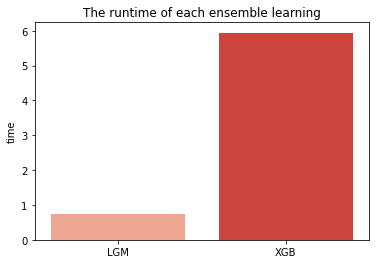

In [34]:
sns.barplot(["LGM", "XGB"], [0.7345755100250244, 5.941572904586792] , palette="Reds")
plt.ylabel("time")
plt.title("The runtime of each ensemble learning")

In [35]:
recall_list=[]
for i in [LGBMClassifier(), XGBClassifier()]:
    recall_list.append(cross_val_score(i, S_train_x, S_train_y, cv=5, scoring="recall").mean())
recall_list

D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:15:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[0.810356244513355, 0.8097450771431272]

In [36]:
precision_list=[]
for i in [LGBMClassifier(), XGBClassifier()]:
    precision_list.append(cross_val_score(i, S_train_x, S_train_y, cv=5, scoring="precision").mean())
precision_list

D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[0.8467229257673523, 0.8477651554713702]

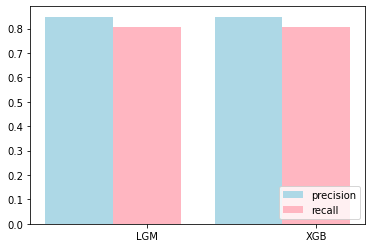

In [37]:
name_list = ['LGM','XGB']
precision = [0.8465209880074716, 0.8485425811795706] #read this number from classification report
recall = [0.8072810638294114, 0.8080802561371716]
x =list(range(len(precision)))
total_width, n = 0.8, 2
width = total_width / n
 
plt.bar(x, precision, width=width, label='precision',fc = 'lightblue')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, recall, width=width, label='recall',tick_label = name_list,fc = 'lightpink')
plt.legend(loc="lower right")

D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


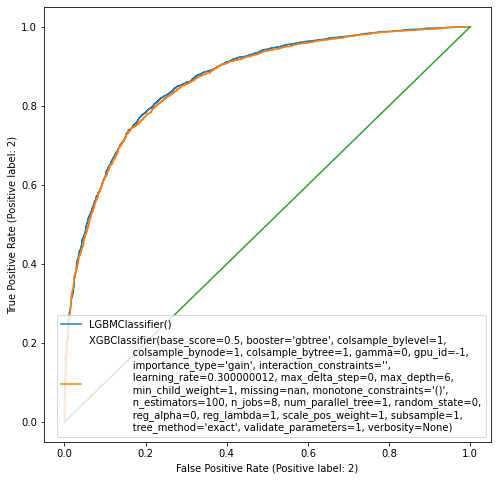

In [38]:
fig, ax=plt.subplots(figsize=(8,8))
for i in [LGBMClassifier(), XGBClassifier()]:
    model=i
    model.fit(S_train_x, S_train_y)
    plot_roc_curve(model, test_x, test_y, ax=ax, label=str(i))
plt.plot([0,1],[0,1])

In [39]:
model=XGBClassifier(n_estimators=20, eval_metric=["auc", "error"])
model.fit(S_train_x, S_train_y, eval_set=[(test_x, test_y)])

[0]	validation_0-auc:0.83610	validation_0-error:0.22478


D:\programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-auc:0.84527	validation_0-error:0.21663
[2]	validation_0-auc:0.84883	validation_0-error:0.21639
[3]	validation_0-auc:0.85183	validation_0-error:0.21483
[4]	validation_0-auc:0.85289	validation_0-error:0.21435
[5]	validation_0-auc:0.85501	validation_0-error:0.21232
[6]	validation_0-auc:0.85537	validation_0-error:0.21088
[7]	validation_0-auc:0.85660	validation_0-error:0.21028
[8]	validation_0-auc:0.85791	validation_0-error:0.20896
[9]	validation_0-auc:0.85998	validation_0-error:0.20728
[10]	validation_0-auc:0.86054	validation_0-error:0.20645
[11]	validation_0-auc:0.86123	validation_0-error:0.20393
[12]	validation_0-auc:0.86172	validation_0-error:0.20429
[13]	validation_0-auc:0.86191	validation_0-error:0.20525
[14]	validation_0-auc:0.86245	validation_0-error:0.20513
[15]	validation_0-auc:0.86256	validation_0-error:0.20549
[16]	validation_0-auc:0.86279	validation_0-error:0.20489
[17]	validation_0-auc:0.86295	validation_0-error:0.20321
[18]	validation_0-auc:0.86301	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['auc', 'error'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
a="""[0]	validation_0-auc:0.83125	validation_0-error:0.23233
[1]	validation_0-auc:0.84327	validation_0-error:0.22310
[2]	validation_0-auc:0.84765	validation_0-error:0.21951
[3]	validation_0-auc:0.85205	validation_0-error:0.21795
[4]	validation_0-auc:0.85323	validation_0-error:0.21807
[5]	validation_0-auc:0.85384	validation_0-error:0.21723
[6]	validation_0-auc:0.85526	validation_0-error:0.21615
[7]	validation_0-auc:0.85721	validation_0-error:0.21603
[8]	validation_0-auc:0.85776	validation_0-error:0.21483
[9]	validation_0-auc:0.85836	validation_0-error:0.21352
[10]	validation_0-auc:0.85922	validation_0-error:0.21232
[11]	validation_0-auc:0.86094	validation_0-error:0.21076
[12]	validation_0-auc:0.86159	validation_0-error:0.21136
[13]	validation_0-auc:0.86229	validation_0-error:0.21076
[14]	validation_0-auc:0.86264	validation_0-error:0.20884
[15]	validation_0-auc:0.86285	validation_0-error:0.21028
[16]	validation_0-auc:0.86274	validation_0-error:0.20980
[17]	validation_0-auc:0.86308	validation_0-error:0.20932
[18]	validation_0-auc:0.86382	validation_0-error:0.20728
[19]	validation_0-auc:0.86390	validation_0-error:0.20657"""

In [41]:
val_auc=[]
val_error=[]
for i in a.split("\n"):
    val_error.append(float(i.split(":")[-1]))
    val_auc.append(float(i.split(":")[1].split("\t")[0]))

In [42]:
model=LGBMClassifier(n_estimators=20, metric="auc")
model.fit(S_train_x, S_train_y, eval_set=[(test_x, test_y)])

[1]	valid_0's auc: 0.835474
[2]	valid_0's auc: 0.843051
[3]	valid_0's auc: 0.844872
[4]	valid_0's auc: 0.846601
[5]	valid_0's auc: 0.846609
[6]	valid_0's auc: 0.848457
[7]	valid_0's auc: 0.849682
[8]	valid_0's auc: 0.851137
[9]	valid_0's auc: 0.851895
[10]	valid_0's auc: 0.852383
[11]	valid_0's auc: 0.853336
[12]	valid_0's auc: 0.853651
[13]	valid_0's auc: 0.854138
[14]	valid_0's auc: 0.855071
[15]	valid_0's auc: 0.855113
[16]	valid_0's auc: 0.855571
[17]	valid_0's auc: 0.856409
[18]	valid_0's auc: 0.856785
[19]	valid_0's auc: 0.857293
[20]	valid_0's auc: 0.857614


LGBMClassifier(metric='auc', n_estimators=20)

In [43]:
b="""[1]	valid_0's auc: 0.834787
[2]	valid_0's auc: 0.842662
[3]	valid_0's auc: 0.844505
[4]	valid_0's auc: 0.845319
[5]	valid_0's auc: 0.845519
[6]	valid_0's auc: 0.846959
[7]	valid_0's auc: 0.847916
[8]	valid_0's auc: 0.84902
[9]	valid_0's auc: 0.849984
[10]	valid_0's auc: 0.850687
[11]	valid_0's auc: 0.851616
[12]	valid_0's auc: 0.852354
[13]	valid_0's auc: 0.85313
[14]	valid_0's auc: 0.853654
[15]	valid_0's auc: 0.853839
[16]	valid_0's auc: 0.854262
[17]	valid_0's auc: 0.854543
[18]	valid_0's auc: 0.854846
[19]	valid_0's auc: 0.855305
[20]	valid_0's auc: 0.856077"""

In [44]:
val_auc1=[]
for i in b.split("\n"):
    val_auc1.append(float(i.split(":")[-1]))

([<matplotlib.axis.XTick at 0x16ba7edae88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

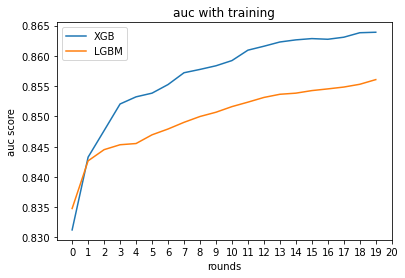

In [45]:
plt.plot(val_auc)
plt.plot(val_auc1)
plt.legend(["XGB", "LGBM"])
plt.title("auc with training")
plt.xlabel("rounds")
plt.ylabel("auc score")
plt.xticks(list(range(21)))

In [46]:
a.split("\n")

['[0]\tvalidation_0-auc:0.83125\tvalidation_0-error:0.23233',
 '[1]\tvalidation_0-auc:0.84327\tvalidation_0-error:0.22310',
 '[2]\tvalidation_0-auc:0.84765\tvalidation_0-error:0.21951',
 '[3]\tvalidation_0-auc:0.85205\tvalidation_0-error:0.21795',
 '[4]\tvalidation_0-auc:0.85323\tvalidation_0-error:0.21807',
 '[5]\tvalidation_0-auc:0.85384\tvalidation_0-error:0.21723',
 '[6]\tvalidation_0-auc:0.85526\tvalidation_0-error:0.21615',
 '[7]\tvalidation_0-auc:0.85721\tvalidation_0-error:0.21603',
 '[8]\tvalidation_0-auc:0.85776\tvalidation_0-error:0.21483',
 '[9]\tvalidation_0-auc:0.85836\tvalidation_0-error:0.21352',
 '[10]\tvalidation_0-auc:0.85922\tvalidation_0-error:0.21232',
 '[11]\tvalidation_0-auc:0.86094\tvalidation_0-error:0.21076',
 '[12]\tvalidation_0-auc:0.86159\tvalidation_0-error:0.21136',
 '[13]\tvalidation_0-auc:0.86229\tvalidation_0-error:0.21076',
 '[14]\tvalidation_0-auc:0.86264\tvalidation_0-error:0.20884',
 '[15]\tvalidation_0-auc:0.86285\tvalidation_0-error:0.21028',
 '

In [47]:
model=LGBMClassifier()


In [48]:
model.fit(S_train_x,S_train_y)

LGBMClassifier()

In [49]:
y_pred = model.predict(test_x)


In [50]:
cm=confusion_matrix(test_y,y_pred)

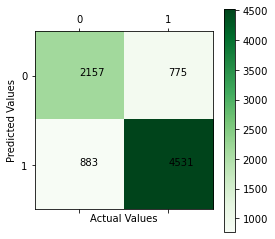

In [51]:
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
plt.annotate(cm[0,1],xy=(0,1))
plt.annotate(cm[1,1],xy=(1,1))
plt.annotate(cm[0,0],xy=(0,0))
plt.annotate(cm[1,0],xy=(1,0))
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.show()